In [60]:
import SimpleITK as sitk
import matplotlib.pyplot as plt
import numpy as np

plt.set_cmap('gray')
plt.rcParams['figure.figsize'] = (10, 8)

<Figure size 720x576 with 0 Axes>

In [21]:
t2_path = '/raid/SubtleGAD_Stanford/lowcon/Patient_0187/10_AX_T2'
t2_ids = sitk.ImageSeriesReader.GetGDCMSeriesIDs(t2_path)
t2_files = sitk.ImageSeriesReader.GetGDCMSeriesFileNames(t2_path, t2_ids[0])
t2_reader = sitk.ImageSeriesReader()
t2_reader.SetFileNames(t2_files)
t2_reader.MetaDataDictionaryArrayUpdateOn()
t2_reader.LoadPrivateTagsOn()
t2_vol = t2_reader.Execute()

In [25]:
t1_path = '/home/srivathsa/projects/studies/gad/stanford/data/Patient_0187/8_AX_BRAVO'
t1_ids = sitk.ImageSeriesReader.GetGDCMSeriesIDs(t1_path)
t1_files = sitk.ImageSeriesReader.GetGDCMSeriesFileNames(t1_path, t1_ids[0])
t1_reader = sitk.ImageSeriesReader()
t1_reader.SetFileNames(t1_files)
t1_reader.MetaDataDictionaryArrayUpdateOn()
t1_reader.LoadPrivateTagsOn()
t1_vol = t1_reader.Execute()

In [62]:
print(t1_vol.GetOrigin())
print(t1_vol.GetDirection())
print(t1_vol.SetPixel())
print(t1_vol)

(-129.74600219726562, -174.30799865722656, -57.30459976196289)
(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
None
Image (0x240a7a0)
  RTTI typeinfo:   itk::Image<short, 3u>
  Reference Count: 1
  Modified Time: 58486
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 0
  UpdateMTime: 0
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 364]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 364]
  RequestedRegion: 
    Dimension: 3
    Index: [50, 0, 0]
    Size: [1, 512, 364]
  Spacing: [0.5078, 0.5078, 0.5]
  Origin: [-129.746, -174.308, -57.3046]
  Direction: 
1 0 0
0 1 0
0 0 1

  IndexToPointMatrix: 
0.5078 0 0
0 0.5078 0
0 0 0.5

  PointToIndexMatrix: 
1.96928 0 0
0 1.96928 0
0 0 2

  Inverse Direction: 
1 0 0
0 1 0
0 0 1

  PixelContainer: 
    ImportImageConta

In [32]:
print(t2_vol.GetOrigin())
print(t2_vol.GetDirection())
print(t2_vol)

(-124.62200164794922, -162.88600158691406, -21.604900360107422)
(0.9972623193553337, -0.01143739426828992, 0.07305513264906342, -5.726444623538511e-09, 0.9879655048931856, 0.15467437131326306, -0.07394502278058024, -0.15425092269903898, 0.9852607707873458)
Image (0x3339870)
  RTTI typeinfo:   itk::Image<short, 3u>
  Reference Count: 1
  Modified Time: 10788
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 9397
  UpdateMTime: 10625
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 34]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 34]
  RequestedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 34]
  Spacing: [0.4688, 0.4688, 4.99992]
  Origin: [-124.622, -162.886, -21.6049]
  Direction: 
0.997262 -0.0114374 0.0730551
-5.72644e-09 0.987966 0.1

In [35]:
pmap = sitk.GetDefaultParameterMap('rigid')
ef = sitk.ElastixImageFilter()
ef.SetFixedImage(t1_vol)
ef.SetMovingImage(t2_vol)
ef.SetParameterMap(pmap)
ef.Execute()

<SimpleITK.SimpleITK.Image; proxy of <Swig Object of type 'std::vector< itk::simple::Image >::value_type *' at 0x7f52896e3c90> >

In [36]:
t2_reg = sitk.GetArrayFromImage(ef.GetResultImage())

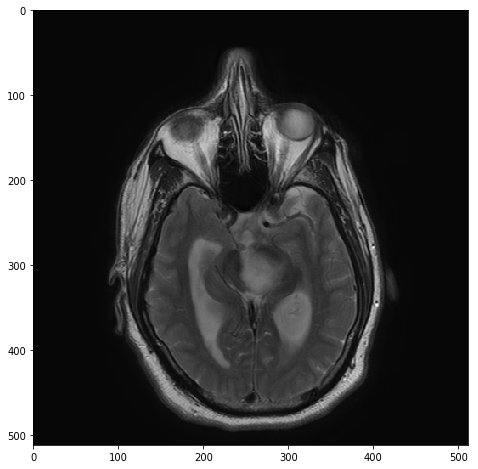

In [63]:
plt.imshow(t2_reg[150])

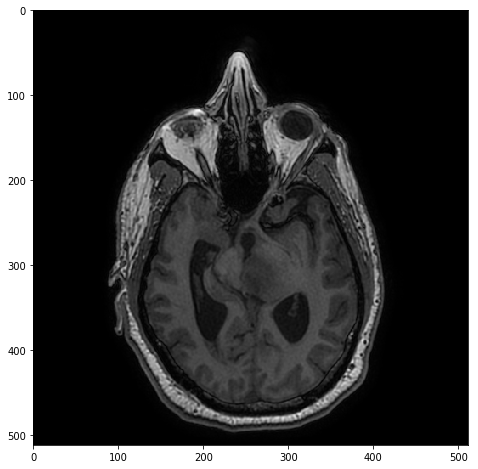

In [64]:
t1_img = sitk.GetArrayFromImage(t1_vol)
plt.imshow(t1_img[150])

In [65]:
test_img = sitk.GetImageFromArray(np.zeros((364, 512, 512)))

In [66]:
print(test_img.GetDirection())

(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
